<a href="https://colab.research.google.com/github/VisnuRitesh/letter-classifier/blob/main/Tamil_Handwritten_Text_Classifier.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Importing the dataset

In [1]:
from google.colab import drive

In [2]:
drive.mount('/content/gdrive')

Mounted at /content/gdrive


#Importing the libraries

In [3]:
!pip install -Uqq fastbook
from fastbook import *

     |████████████████████████████████| 727kB 7.7MB/s 
     |████████████████████████████████| 194kB 16.0MB/s 
     |████████████████████████████████| 51kB 7.9MB/s 
     |████████████████████████████████| 1.2MB 22.8MB/s 
     |████████████████████████████████| 61kB 9.9MB/s 


In [4]:
!unzip /content/gdrive/MyDrive/Datasets/tamil_letters.zip

Streaming output truncated to the last 5000 lines.
  inflating: tamil_letters/yee/433.tiff  
  inflating: tamil_letters/yee/434.tiff  
  inflating: tamil_letters/yee/435.tiff  
  inflating: tamil_letters/yee/436.tiff  
  inflating: tamil_letters/yee/437.tiff  
  inflating: tamil_letters/yee/438.tiff  
  inflating: tamil_letters/yee/439.tiff  
  inflating: tamil_letters/yee/44.tiff  
  inflating: tamil_letters/yee/440.tiff  
  inflating: tamil_letters/yee/441.tiff  
  inflating: tamil_letters/yee/442.tiff  
  inflating: tamil_letters/yee/443.tiff  
  inflating: tamil_letters/yee/444.tiff  
  inflating: tamil_letters/yee/445.tiff  
  inflating: tamil_letters/yee/446.tiff  
  inflating: tamil_letters/yee/447.tiff  
  inflating: tamil_letters/yee/448.tiff  
  inflating: tamil_letters/yee/449.tiff  
  inflating: tamil_letters/yee/45.tiff  
  inflating: tamil_letters/yee/450.tiff  
  inflating: tamil_letters/yee/451.tiff  
  inflating: tamil_letters/yee/452.tiff  
  inflating: tamil_letters/

#Creating a Data Block

In [11]:
db = DataBlock(blocks = (ImageBlock, CategoryBlock),
               get_items = get_image_files,
               splitter = RandomSplitter(seed = 42),
               get_y = parent_label,
               item_tfms = Resize(28),
               batch_tfms = aug_transforms(size = 224, min_scale = 0.75))

# Creating Data Loaders

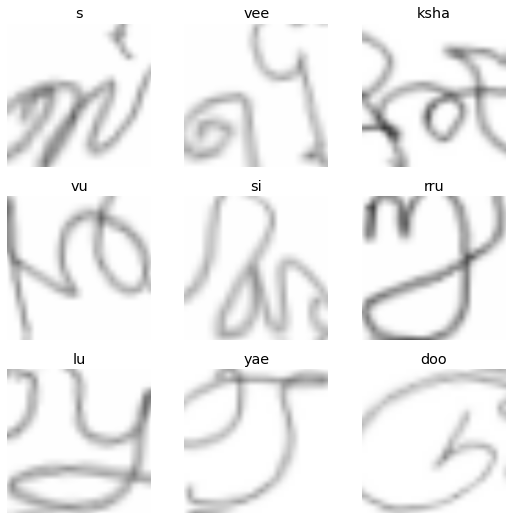

In [12]:
path = '/content/tamil_letters'

dls = db.dataloaders(path)
dls.show_batch(nrows=3, ncols=3)

# Making a baseline model

In [13]:
learn = cnn_learner(dls, resnet50, metrics = accuracy)

In [ ]:
learn.fine_tune(25)

epoch,train_loss,valid_loss,accuracy,time
0,2.346099,1.546766,0.540488,11:33


epoch,train_loss,valid_loss,accuracy,time


In [ ]:
learn.export()